# MATH50003 Numerical Analysis: Problem Sheet 8

This problem sheet explores the Discrete Fourier Transform (DFT),
the Fast Fourier Transform (FFT), and orthogonal polynomials,

Questions marked with a ⋆ are meant to be completed without using a computer.
Problems are denoted A/B/C to indicate their difficulty.

In [1]:
using LinearAlgebra, Plots, Test

## 1. DFT

**Problem 1.1⋆ (C)** Show that the DFT $Q_n$ is symmetric ($Q_n = Q_n^⊤$) but not Hermitian ($Q_n ≠ Q_n^⋆$).

**Problem 1.2⋆ (A)** Show for $0 ≤ k,ℓ ≤ n-1$
$$
{1 \over n} \sum_{j=1}^n \cos k θ_j \cos ℓ θ_j = \begin{cases} 1 & k = ℓ = 0 \\
                                                  1/2 & k = ℓ \\
                                                  0 & \hbox{otherwise}
                                                  \end{cases}
$$
for $θ_j = π(j-1/2)/n$. Hint: Be careful as the $\theta_j$ differ from before, 
and only cover half the period, $[0,\pi]$. Using symmetry may help.
You may also consider replacing $\cos$ with 
complex exponentials:
$$
\cos θ = {{\rm e}^{{\rm i}θ} + {\rm e}^{-{\rm i}θ} \over 2}.
$$




**Problem 1.3⋆ (B)** Consider the Discrete Cosine Transform (DCT)
$$
C_n := \begin{bmatrix}
\sqrt{1/n} \\
 & \sqrt{2/n} \\ 
 && ⋱ \\
 &&& \sqrt{2/n}
 \end{bmatrix}
\begin{bmatrix}
    1 & ⋯ & 1\\
    \cos θ_1 & ⋯ & \cos θ_n \\
    ⋮ & ⋱ & ⋮ \\
    \cos (n-1)θ_1 & ⋯ & \cos (n-1)θ_n
\end{bmatrix}
$$
for $θ_j = π(j-1/2)/n$. Prove that $C_n$ is orthogonal: $C_n^⊤ C_n = C_n C_n^⊤ = I$.
Hint: $C_n C_n^⊤ = I$ might be easier to show than $C_n^⊤ C_n = I$ using the previous problem.






**Problem 1.4 (B)**  A function with a jump does not have uniformly
converging coefficients. Plot interpolant for ${\rm sign}(θ-1/2)$.
Conjecture where the approximation converges. (This is known as
Gibb's phenomena.) **Note** This is non-examinable as it is computer-based.

In [10]:
function finitefourier(𝐟̂ₙ, θ)
    # fₙ as the vector of coefficients
    # θ the point at which the function is evaluted
    m = n ÷ 2 # use coefficients between -m:m
    ret = 0.0 + 0.0im # coefficients are complex so we need complex arithmetic
    for k = 0:m
        ret += 𝐟̂ₙ[k+1] * exp(im*k*θ)
    end
    for k = -m:-1
        ret += 𝐟̂ₙ[end+k+1] * exp(im*k*θ)
    end
    ret
end

finitefourier (generic function with 1 method)

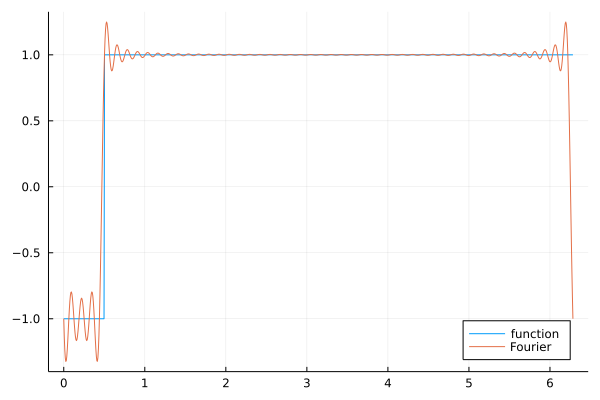

In [12]:
# interpolant for sign(θ-1/2)
N = 100
θ = range(-1, 1; length = N)
f = θ -> sign(θ-1/2)

n = N
θ = range(0,2π; length=n+1)[1:end-1] # θ_0, …,θ_{n-1}, dropping θ_n == 2π
Qₙ = 1/sqrt(n) * [exp(-im*(k-1)*θ[j]) for k = 1:n, j=1:n]
𝐟̂ₙ = 1/sqrt(n) * Qₙ * f.(θ)

fₙ = θ -> finitefourier(𝐟̂ₙ, θ)
g = range(0, 2π; length=1000) # plotting grid
plot(g, f.(g); label="function", legend=:bottomright)
plot!(g, real.(fₙ.(g)); label="Fourier")



## 2. FFT 

**Problem 2.1⋆ (B)** Show that $Q_{2n}$ can also be reduced to $Q_n$ applied
to two vectors.



## 3. Orthogonal polynomials

**Problem 3.1⋆  (B)** Construct  $p_0(x),p_1(x),p_2(x),p_3(x)$, monic OPs
for the weight $\sqrt{1-x^2}$ on $[-1,1]$.
Hint: first compute $\int_{-1}^1 x^k \sqrt{1-x^2} {\rm d} x$ for $0 ≤ k ≤ 2$
using a change-of-variables.



**Problem 3.2⋆  (C, 3-term recurrence, 1st form)**
Show that if $\{p_n\}$ are OPs then there exist real constants $A_n ≠ 0$, $B_n$, and $C_n$
such that
$$
\begin{align*}
p_1(x) &= (A_0 x + B_0) p_0(x) \\
p_{n+1}(x) &= (A_n x + B_n) p_n(x) - C_n p_{n-1}(x)
\end{align*}
$$
Write this as a lower triangular linear system, given $p_0(x) = μ ∈ ℝ$:
$$
L_x \begin{bmatrix} p_0(x) \\ \vdots \\ p_{n-1}(x) \end{bmatrix} = \begin{bmatrix} μ \\ 0 \\ ⋮ \\ 0 \end{bmatrix}
$$


**Problem 3.3⋆  (B)** Show that if $f(x)$ is a degree $n-1$ polynomial
$$
f(x) = [p_0(x) | ⋯ | p_{n-1}(x)] \underbrace{\begin{bmatrix} c_0 \\ \vdots \\ c_{n-1} \end{bmatrix}}_{\bf c}
$$
then evaluation at a point can be recast as inverting an upper triangular system
(_Clenshaw's algorithm_):
$$
f(x) = μ𝐞_1^⊤ U_x^{-1} {\bf c}.
$$

**Problem 3.4⋆  (B)** If $w(-x) = w(x)$ for a weight supported on $[-b,b]$ show that $a_n = 0$.
Hint: first show that the (monic) polynomials $p_{2n}(x)$ are even and $p_{2n+1}(x)$ are odd.